# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset:https://www.kaggle.com/datasets/uppulurimadhuri/dataset/data

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# create a dataframe apdf  (Autism_prediction.csv)
apdf=pd.read_csv('Autism_prediction.csv')
apdf.head(5)

,Unnamed: 0,CASE_NO_PATIENT'S,A10_Autism_Spectrum_Quotient,Social_Responsiveness_Scale,Age_Years,Qchat_10_Score,Speech_Delay_Language_Disorder,Learning_disorder,Genetic_Disorders,Depression,Global_developmental_delay_intellectual_disability,Social_Behavioural_Issues,Childhood_Autism_Rating_Scale,Anxiety_disorder,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD_traits
0,0,1,1,3.0,2,3.0,Yes,Yes,Yes,Yes,Yes,Yes,1,Yes,F,middle eastern,Yes,No,family member,No
1,1,2,0,6.0,3,4.0,Yes,Yes,Yes,Yes,Yes,Yes,2,Yes,M,white european,Yes,No,family member,Yes
2,2,3,1,7.0,3,4.0,Yes,Yes,Yes,Yes,Yes,Yes,4,Yes,M,middle eastern,Yes,No,family member,Yes
3,3,4,1,1.0,2,10.0,Yes,Yes,No,Yes,Yes,Yes,2,Yes,M,hispanic,No,No,family member,Yes
4,4,5,1,3.0,2,9.0,Yes,Yes,No,Yes,Yes,Yes,1,Yes,F,white european,No,No,family member,Yes


## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.
The 2 variables we found the strongest correlation with are 'Qchat_10_Score' and 'Social_Responsiveness_Scale'

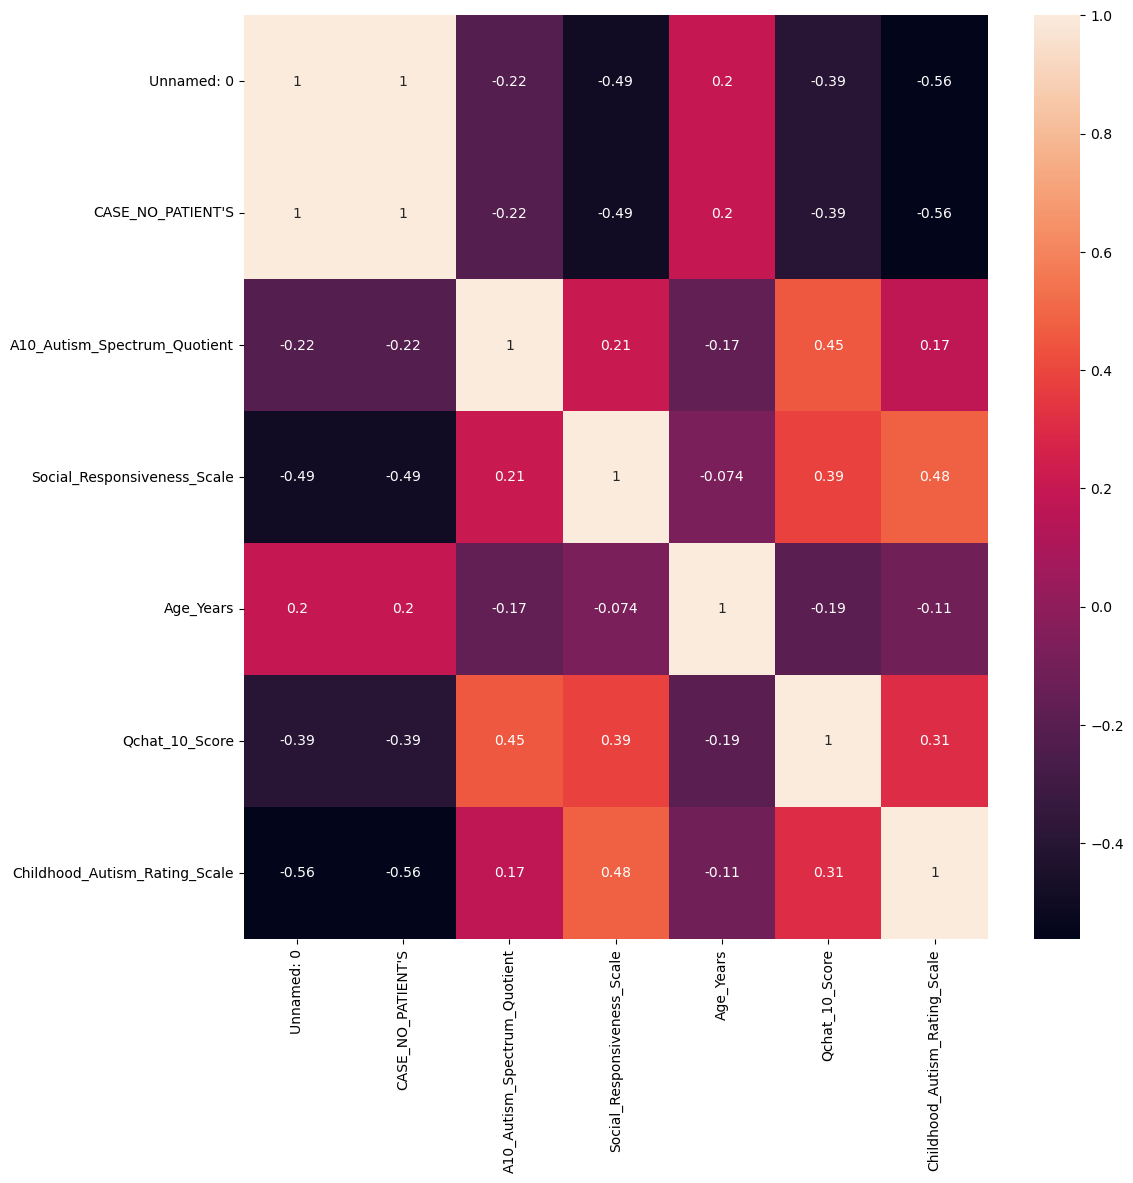

In [2]:
plt.figure(figsize = (12,12))
sns.heatmap(apdf.select_dtypes(['float64','int64']).corr(),annot =True)
plt.show()

## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

In [3]:
# Creating X and y
X = apdf['Qchat_10_Score']
y = apdf['Social_Responsiveness_Scale']

# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

# Take a look at the train dataset
X_train
y_train

737      7.0
549      9.0
1416     0.0
1539     0.0
953     10.0
        ... 
1879     0.0
1895     0.0
1859     0.0
792      5.0
1544     0.0
Name: Social_Responsiveness_Scale, Length: 1346, dtype: float64

In [4]:
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

# Performing a summary to list out all the different parameters of the regression line fitted
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Social_Responsiveness_Scale   R-squared:                       0.165
Model:                                     OLS   Adj. R-squared:                  0.164
Method:                          Least Squares   F-statistic:                     264.8
Date:                         Mon, 16 Oct 2023   Prob (F-statistic):           1.78e-54
Time:                                 21:10:16   Log-Likelihood:                -3540.0
No. Observations:                         1346   AIC:                             7084.
Df Residuals:                             1344   BIC:                             7095.
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.9509      0.159      5.980      0.000       0.639       1.263
Qchat_10_Score     0.5096      0.031     16.272      0.000       0.448       0.571
==============================================================================
Omnibus:                      147.358   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.698
Skew:                           0.923   Prob(JB):                     5.27e-43
Kurtosis:                       2.747   Cond. No.                         9.05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

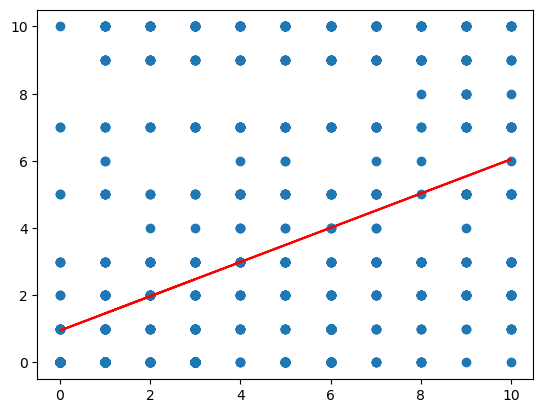

In [5]:
# Visualizing the regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, 0.9509+ 0.5096*X_train, 'r')
plt.show()

## Error Terms

Finally, plot your error terms!

C:\Users\harit\AppData\Local\Temp\ipykernel_24328\3336180004.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


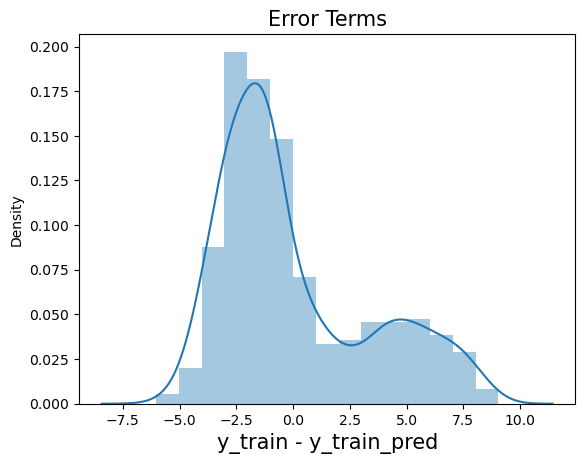

In [6]:
# Predicting y_value using traingn data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

# Plotting the histogram using the residual values
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value? 0.165
2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset?  yes
3. Was your plot of the error terms a bell curve? yes